In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [2]:
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

def get_data(pageNo, keyword):  
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)
    driver = webdriver.Chrome(options=chrome_options)

    url = f'https://www.amazon.in/s?k={keyword}&page={pageNo}'
    driver.get(url)

    # Wait for a certain element to be present (adjust as needed)
    driver.implicitly_wait(10)

    content = driver.page_source
    soup = BeautifulSoup(content, 'html.parser')

    alls = []
    unknown_count = 0  # Counter for Unknown-Product
    for d in soup.find_all('div', class_='sg-col-inner'):
        # Check the first class
        name_element = d.find('span', class_='a-size-medium a-color-base a-text-normal')
        
        # If the first class is not found, check the second class
        if not name_element:
            name_element = d.find('span', class_='a-size-base-plus a-color-base a-text-normal')

        # Skip if the name is not available
        if not name_element:
            continue

        # Extract the name
        name = name_element.text.strip()

        # Count Unknown-Product and skip the first 4
        if name == "Unknown-Product":
            unknown_count += 1
            if unknown_count <= 4:
                continue

        rating_element = d.find('span', attrs={'class': 'a-icon-alt'})
        rating = rating_element.text.strip() if rating_element else "0"

        users_rated_element = d.find('span', attrs={'class': 'a-size-base s-underline-text'})
        users_rated_text = users_rated_element.text.strip() if users_rated_element else "0"

        # Extracting URL
        url_element = d.find('a', class_='a-link-normal s-no-outline')
        url = "https://www.amazon.in" + url_element['href'] if url_element else "Not Found"

        
        # Use a try-except block to handle the conversion safely
        try:
            users_rated = int(re.sub('[^0-9]', '', users_rated_text))
        except ValueError:
            users_rated = 0

        price_element = d.find('span', attrs={'class': 'a-price-whole'})
        price_text = price_element.text.strip() if price_element else "0"

        # Use a try-except block to handle the conversion safely
        try:
            price = int(re.sub('[^0-9]', '', price_text))
        except ValueError:
            price = 0

        all1 = [name, rating, users_rated, price, url]
        alls.append(all1)

    driver.quit()

    return alls
result = get_data(1, 'keyboard')

In [3]:
keyword = input("What do you want to search for?")
no_pages = 2

In [4]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i,keyword))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Product Name','Rating','Customers_Rated', 'Price', 'URL'])  # Adding 'URL' column
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [5]:
df=pd.read_csv("amazon_products.csv")

# Set the display width to ensure that full URLs are displayed
pd.set_option('display.max_colwidth', None)

In [9]:
df.head()

,Product Name,Rating,Customers_Rated,Price,URL
0,MI 80 cm (32 inches) A Series HD Ready Smart Google TV L32M8-5AIN (Black),4.2 out of 5 stars,57228,12990,https://www.amazon.in/MI-inches-Ready-Google-L32M8-5AIN/dp/B0CH33P1PV/ref=sr_1_1?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-1
1,MI 80 cm (32 inches) A Series HD Ready Smart Google TV L32M8-5AIN (Black),4.2 out of 5 stars,57228,12990,https://www.amazon.in/MI-inches-Ready-Google-L32M8-5AIN/dp/B0CH33P1PV/ref=sr_1_1?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-1
2,TCL 101 cm (40 inches) Bezel-Less S Series Full HD Smart Android LED TV 40S5400A (Black),4.0 out of 5 stars,5903,16990,https://www.amazon.in/TCL-inches-Bezel-Less-Android-40S5400A/dp/B0C146SQVS/ref=sr_1_2?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-2
3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74L (Black),4.7 out of 5 stars,11688,75999,https://www.amazon.in/Sony-Bravia-inches-Google-KD-65X74L/dp/B0C1HCS2WZ/ref=sr_1_3?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-3
4,Sony Bravia 139 cm (55 inches) 4K Ultra HD Smart LED Google TV KD-55X74L (Black),4.7 out of 5 stars,11688,57990,https://www.amazon.in/Sony-Bravia-inches-Google-KD-55X74L/dp/B0C1HCJVT5/ref=sr_1_4?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-4


In [10]:
df.shape

(34, 5)

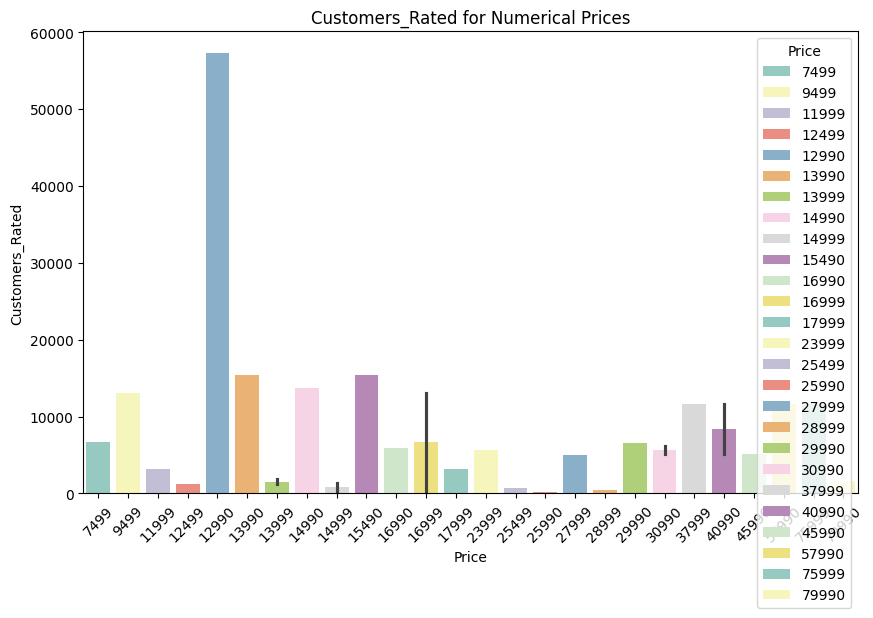

In [19]:
# 1. Comparison of Customers_Rated for numerical Price
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Price', y='Customers_Rated', palette='Set3',hue='Price')
plt.title('Customers_Rated for Numerical Prices')
plt.xlabel('Price')
plt.ylabel('Customers_Rated')
plt.xticks(rotation=45)
plt.show()

In [12]:
df.describe()

,Customers_Rated,Price
count,34.000000,34.000000
mean,9356.529412,26156.264706
std,13111.680599,17584.472733
min,133.000000,7499.000000
25%,1683.750000,14246.750000
50%,5381.000000,17499.000000
75%,11688.000000,30990.000000
max,57228.000000,79990.000000


In [13]:
Customers_Rated_mean=df['Customers_Rated'].mean()
Price_mean=df['Price'].mean()/2
Best_product=df[(df["Customers_Rated"]>=Customers_Rated_mean) & (df["Price"]>=Price_mean)]

In [15]:
Best_product.shape

(9, 5)

In [16]:
Best_product

,Product Name,Rating,Customers_Rated,Price,URL
3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74L (Black),4.7 out of 5 stars,11688,75999,https://www.amazon.in/Sony-Bravia-inches-Google-KD-65X74L/dp/B0C1HCS2WZ/ref=sr_1_3?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-3
4,Sony Bravia 139 cm (55 inches) 4K Ultra HD Smart LED Google TV KD-55X74L (Black),4.7 out of 5 stars,11688,57990,https://www.amazon.in/Sony-Bravia-inches-Google-KD-55X74L/dp/B0C1HCJVT5/ref=sr_1_4?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-4
6,LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray),4.3 out of 5 stars,15423,13990,https://www.amazon.in/LG-inches-Ready-Smart-32LM563BPTC/dp/B08DPLCM6T/ref=sr_1_6?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-6
8,Samsung 80 cm (32 inches) HD Ready Smart LED TV UA32T4380AKXXL (Glossy Black),4.2 out of 5 stars,13714,14990,https://www.amazon.in/Samsung-inches-Ready-UA32T4380AKXXL-Glossy/dp/B0B8YTGC23/ref=sr_1_8?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-8
11,Sony Bravia 108 cm (43 inches) 4K Ultra HD Smart LED Google TV KD-43X64L (Black),4.7 out of 5 stars,11688,40990,https://www.amazon.in/Sony-Bravia-inches-Google-KD-43X64L/dp/B0C1H9Z4DC/ref=sr_1_11?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-11
20,LG 80 cm (32 inches) HD Ready Smart LED TV 32LQ643BPTA (Black),4.3 out of 5 stars,15423,15490,https://www.amazon.in/LG-inches-Ready-Smart-32LQ643BPTA/dp/B0CD1S96SM/ref=sr_1_19?dib=eyJ2IjoiMSJ9.SaFFthMPviJd6UoiRz_SY-1_mzmbxeAHWBfT48_TSAZk7wIjekh_HGeFRQKcNBclYzhV2IeChElHhtXDIoR8mOc3TresVnl2te31MO0PyzY5QI5qfDju0uON3BxjMYrV0OSpW-NPHGFTPD9bQTA7P2deSGyg95chCZQ6CdEg64-EvvN5qy_q3wEB7JbYUuuSsmYNC8JHEznMx8-5mOzGv6JMXt_bKgLAMLVe518qu6E.mySzlx5njnc-EzcGeCZ-DGcwQTRB1i1GGnW5Uc6b_3M&dib_tag=se&keywords=tv&qid=1713173388&sr=8-19
25,Kodak 108 cm (43 inches) 9XPRO Series Full HD Certified Android LED TV 439X5081 (Black),4.1 out of 5 stars,13036,16999,https://www.amazon.in/Kodak-inches-Certified-Android-439X5081/dp/B0C61WSCCC/ref=sr_1_24?dib=eyJ2IjoiMSJ9.SaFFthMPviJd6UoiRz_SY-1_mzmbxeAHWBfT48_TSAZk7wIjekh_HGeFRQKcNBclYzhV2IeChElHhtXDIoR8mOc3TresVnl2te31MO0PyzY5QI5qfDju0uON3BxjMYrV0OSpW-NPHGFTPD9bQTA7P2deSGyg95chCZQ6CdEg64-EvvN5qy_q3wEB7JbYUuuSsmYNC8JHEznMx8-5mOzGv6JMXt_bKgLAMLVe518qu6E.mySzlx5njnc-EzcGeCZ-DGcwQTRB1i1GGnW5Uc6b_3M&dib_tag=se&keywords=tv&qid=1713173388&sr=8-24
28,Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340BKXXL (Glossy Black),4.2 out of 5 stars,13714,14990,https://www.amazon.in/Samsung-Inches-Wondertainment-U

In [17]:
Best_product['URL']

3                       https://www.amazon.in/Sony-Bravia-inches-Google-KD-65X74L/dp/B0C1HCS2WZ/ref=sr_1_3?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-3
4                       https://www.amazon.in/Sony-Bravia-inches-Google-KD-55X74L/dp/B0C1HCJVT5/ref=sr_1_4?dib=eyJ2IjoiMSJ9.Oq5x0cRUa9KAM9fmSVoMWZUceIoT2ysxhjCAZuwPnxk5wRMyjPKnIOeMEkhRn0tgqP0ZprrTs-6uNEszebaJMUtG1mMT2F4xjz-Clkre3VtvOWt9DOwZyKJKzBUHs_wmoRxelFnkGfdaUl44AaWcGu6cJhQBMTbzE_7h7avn5IfpQXKSr-5Jgoquhkg7DloFMZXCsL2AWoudU-r6Heb6IOkZD2F5BHsHgXJ4v0tzD7k.uxT4BrjU1q65lQ2eWx_lMlhMXDukMNbRPYRtSCxbajA&dib_tag=se&keywords=tv&qid=1713173374&sr=8-4
6                         https://www.amazon.in/LG-inches-Ready-Smart-32LM563BPTC/dp/B08DPLCM6T/ref=sr

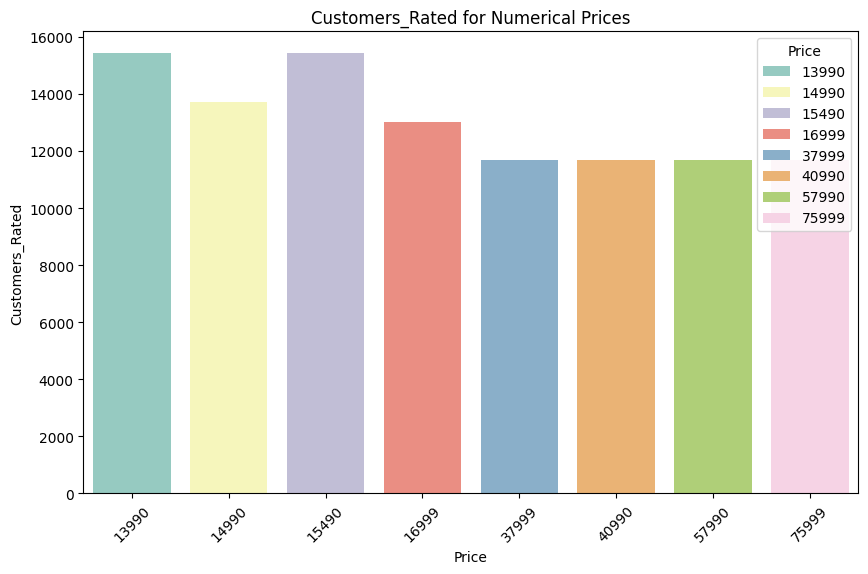

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Comparison of Customers_Rated for numerical Price
plt.figure(figsize=(10, 6))
sns.barplot(data=Best_product, x='Price', y='Customers_Rated', palette='Set3',hue='Price')
plt.title('Customers_Rated for Numerical Prices')
plt.xlabel('Price')
plt.ylabel('Customers_Rated')
plt.xticks(rotation=45)
plt.show()